In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/AI/CuoiKi

/content/drive/MyDrive/AI/CuoiKi


In [3]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
training=train_data.flow_from_directory('/content/drive/MyDrive/AI/CuoiKi_1/Train',target_size=(256,256), batch_size=32, class_mode='categorical')
validation=train_data.flow_from_directory('/content/drive/MyDrive/AI/CuoiKi_1/Validation',target_size=(256,256), batch_size=32, class_mode='categorical')

Found 300 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [5]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(128,(3,3), activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(8,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [6]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 20 lần học (epochs), mỗi lần học thì chỉ học␣256 dữ liệu (batch_size)
history=model.fit(training,epochs=40,batch_size=16,verbose=1, validation_data=validation)

Epoch 1/40
10/10 [==============================] - 114s 10s/step - loss: 1.6212 - accuracy: 0.1933 - val_loss: 1.6016 - val_accuracy: 0.2000
Epoch 2/40
10/10 [==============================] - 12s 1s/step - loss: 1.5937 - accuracy: 0.2100 - val_loss: 1.5353 - val_accuracy: 0.3100
Epoch 3/40
10/10 [==============================] - 12s 1s/step - loss: 1.5347 - accuracy: 0.2800 - val_loss: 1.4232 - val_accuracy: 0.2800
Epoch 4/40
10/10 [==============================] - 12s 1s/step - loss: 1.5172 - accuracy: 0.3133 - val_loss: 1.3867 - val_accuracy: 0.4300
Epoch 5/40
10/10 [==============================] - 12s 1s/step - loss: 1.3116 - accuracy: 0.4567 - val_loss: 1.2814 - val_accuracy: 0.4100
Epoch 6/40
10/10 [==============================] - 12s 1s/step - loss: 1.2697 - accuracy: 0.4567 - val_loss: 1.1643 - val_accuracy: 0.5100
Epoch 7/40
10/10 [==============================] - 13s 1s/step - loss: 1.2165 - accuracy: 0.4933 - val_loss: 1.1101 - val_accuracy: 0.5500
Epoch 8/40
10/10 [

In [7]:
# Lưu 
model.save("CuoiKi.h5")
model_1=load_model('CuoiKi.h5')

In [8]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.27326613664627075
Train Accuracy 0.8933333158493042


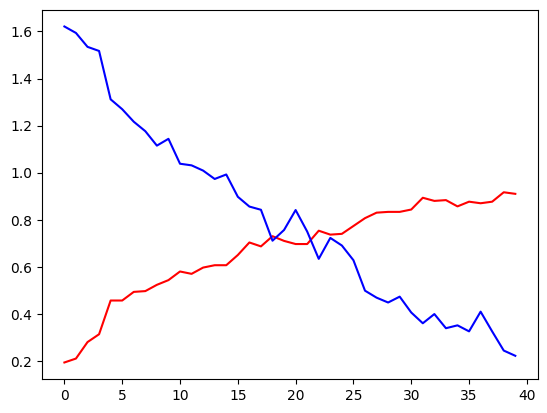

In [9]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label='Training accuracy')
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()

1/1 [==============================] - 0s 345ms/step
Elephant


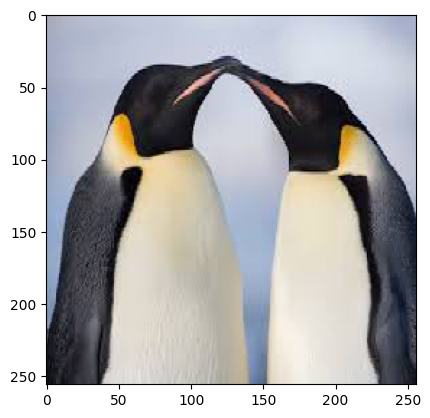

1/1 [==============================] - 0s 29ms/step
Tiger


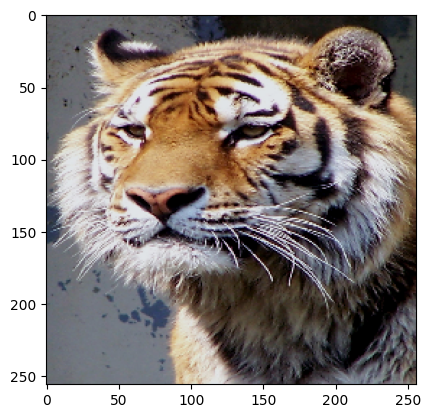

1/1 [==============================] - 0s 47ms/step
Bear


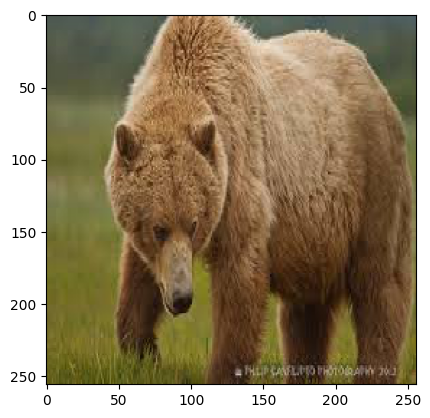

1/1 [==============================] - 0s 29ms/step
Elephant


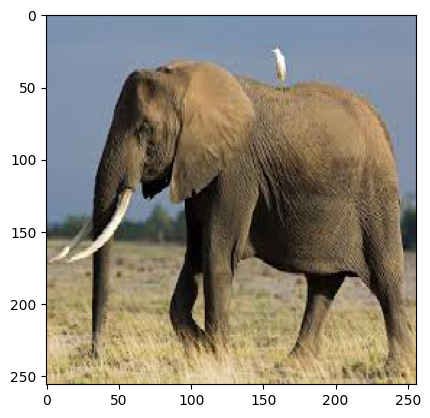

1/1 [==============================] - 0s 30ms/step
Tiger


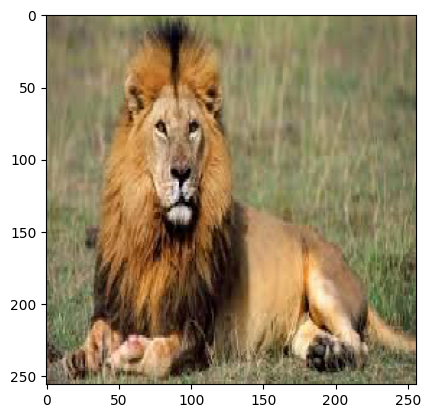

In [10]:
test="/content/drive/MyDrive/AI/CuoiKi_1/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(256,256))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Bear','Elephant','Lion','Penguin','Tiger']
  print(class_name[result])
  plt.show()